In [0]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [21]:
# Define the features and the outcome
# make sure data are evenly divided
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2 
df = heartdisease_df.iloc[:rows, :]

X = df.iloc[:, :13]
y = df.iloc[:, 13]
print(X)
# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)
print(len(y))

        0    1    2      3      4    5    6      7    8    9   10   11   12
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...
297  57.0  0.0  4.0  140.0  241.0  0.0  0.0  123.0  1.0  0.2  2.0  0.0  7.0
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0

[302 rows x 13 columns]
302


In [0]:
X=X.to_numpy()

In [23]:
type(X)

numpy.ndarray

In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [25]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_std)

X_half1,X_half2,X_pcahalf1,X_pcahalf2=train_test_split(X_std,X_pca,test_size=0.5,random_state=13579)
print(X_half1)

[[-0.49988284  0.68787407 -0.16554874 ... -0.97951442 -0.71290492
  -0.86793447]
 [ 0.27885874  0.68787407 -1.20712623 ... -0.97951442  0.35822586
  -0.86793447]
 [ 1.05760033 -1.45375447 -0.16554874 ... -0.97951442 -0.71290492
   1.16397414]
 ...
 [ 1.05760033  0.68787407 -0.16554874 ...  0.64583368 -0.71290492
   1.16397414]
 [ 0.61260514  0.68787407  0.87602875 ...  0.64583368  1.42935664
   1.16397414]
 [-1.27862443  0.68787407  0.87602875 ...  0.64583368 -0.71290492
   1.16397414]]


In [27]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.

for counter in range(2):
    for data in [(X_half1, X_pcahalf1),(X_half2, X_pcahalf2)]:
        print('here')
        print(counter)
        # Put the features into ypred.
        ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
        print('there')
        ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
        print(data[1][:,0])
        # Generate cluster predictions and store them for clusters 2 to 4.
        for nclust in range(2, 5):
            pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
            ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

here
0
there
[-2.08868389 -1.25324535 -0.3125321  -0.11151142 -0.44998064 -2.26999539
  0.78575435 -1.02195065 -0.45217188 -3.28713261  0.54618728  2.52256925
 -0.71746261  0.70910691  3.14444575  0.11883684  2.77439691  2.56802011
 -0.85679831  1.65467693  1.4643666   1.06431335 -0.32096395  2.66123478
  1.76675244  3.05964294  1.28888244  4.15998893 -1.08407195 -0.50699914
  1.31998275  1.22005152 -0.55219914 -3.12335252  0.08822792 -2.14371189
  0.32047668  3.08654505  2.12688522  2.25517251 -0.69637831  0.1317737
 -0.94757937  2.13288908 -1.4227687  -1.9361383  -1.9701628  -3.14809351
 -1.30496444  1.10546668  3.02248329 -1.77139685 -0.93628708 -1.44934985
 -0.7721514   0.11703726 -1.63147107 -2.05957902 -2.02391397  0.32309913
 -0.07839294 -1.38649386 -1.18528492  1.06987107 -0.50765376  1.91047717
  3.22566361 -0.1421144   2.03350867  0.30664574 -1.14862491 -0.20141883
  1.21251207 -1.21902503  1.94120316 -0.53693257  0.28454888  2.31720175
  2.16586929  2.61574066 -2.29190422  3

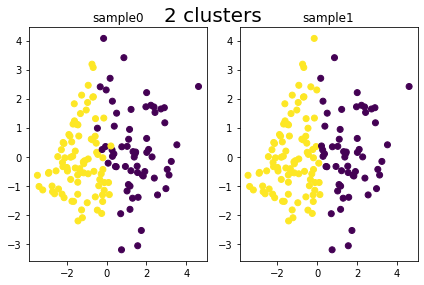

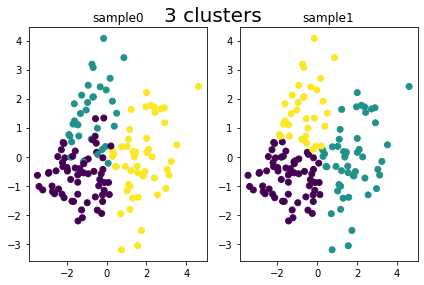

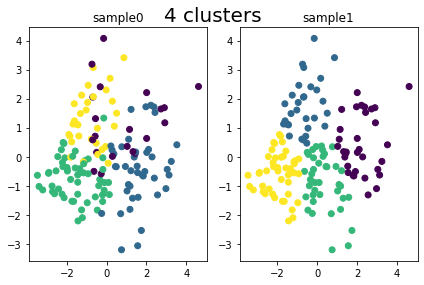

In [29]:
for cluster in range(2,5):
    f,axarr=plt.subplots(1,2)
    for i in range(2):
        x_sub=ypred['pca_f1_sample{}'.format(i)]
        y_sub=ypred['pca_f2_sample{}'.format(i)]
        
        c=ypred['clust{}_sample{}'.format(cluster,i)]
        axarr[i].scatter(x_sub,y_sub,c=c)
        axarr[i].set_title('sample{}'.format(i))
        
    plt.suptitle('{} clusters'.format(cluster),fontsize=20)
    plt.tight_layout()
    plt.show()
    print(' ')

In [0]:
# according the plots above, when n_clusters=2, the clustering is the best among all the solutions

In [43]:
# contingency table
full_pred=KMeans(n_clusters=2, random_state=1120).fit_predict(X_std)
pd.crosstab(y,full_pred)

col_0,0,1
row_0,,
0,38,101
1,150,13


In [0]:
def rand_index_score(grount_truths,predictions):
    tp_plus_fp =scipy.special.comb(np.bincount(grount_truths),2).sum()
    tp_plus_fn =scipy.special.comb(np.bincount(grount_truths),2).sum()
    A =np.c_[(grount_truths,predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:,0]==i,1]), 2).sum() for i in set(grount_truths))
    fp=tp_plus_fp - tp
    fn=tp_plus_fn - tp
    tn=scipy.special.comb(len(A),2)-tp-fp-fn
    return (tn + tn)/(tp + fp + fn + tn)


In [45]:
rand_index_score(y,full_pred)

0.7422938989241161

In [46]:
metrics.adjusted_rand_score(y, full_pred)

0.43661540614807665

In [47]:
# silhouette coefficient
labels=KMeans(n_clusters=2, random_state=122).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels,metric="euclidean"))


0.17440650461256255
